"""

# Author: Varun patwardhan
 
## Program Title :  Adaptive Linear Neuron - Experiments to learn neural networks from scratch
 
#### 21st September 2018
 
"""


In [1]:
import numpy as np
import pandas as pd

In [2]:
class Adaline:
    def __init__(self,learning_rate=0.01,num_iterations=100,randomState=42):
        # set the learning rate
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        np.random.seed(randomState)
    def fit(self,X,Y):
        self.weights_ = np.random.randn(1 + X.shape[1])
        self.sse_ =[]
        for _ in range(0,self.num_iterations):
            
            Yhat = self.activation(X)
            error = Y-Yhat
            self.sse_.append(sum(error**2))
            
            ## adaline rule for updating weights:
            
            self.weights_[1:] = self.weights_[1:] + self.learning_rate* np.dot(np.transpose(X),error) 
            self.weights_[0]= self.weights_[0] + self.learning_rate*sum(error)            
            
    def calc_z(self,independent_v):
        return np.dot(independent_v,self.weights_[1:]) + self.weights_[0]
    def activation(self,independent_v):
        return(self.calc_z(independent_v))
    def predict(self,independent_v):
        return np.where(self.activation(independent_v)>0,1,-1)

In [3]:
a = Adaline(num_iterations=10000) 

In [4]:
X = np.array([[1,2,3,4,5]]).T # declaring a vector i.e. 1* 5 array here

In [5]:
X.shape

(5, 1)

In [6]:
Y = 3*X[:,0] # Lets check if the algorithm implemented can learn simple function f(x) = 3x 

In [7]:
Y

array([ 3,  6,  9, 12, 15])

In [8]:
a.fit(X,Y)

In [9]:
a.weights_

array([5.550061e-15, 3.000000e+00])

## Perfect! This is some real intelligence :)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



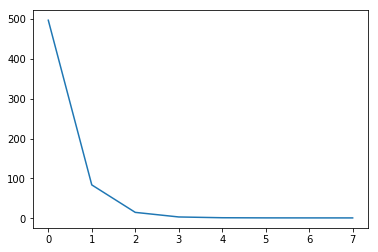

In [11]:
plt.plot(a.sse_[:8]) # Converged in just 8 iterations! 

### Let's plot the decision boundary 

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_bondary(X,y,clf,res=0.01):
    markers = ('o','x','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors=colors[: len(np.unique(y))])
    
    return 0

In [14]:
from mlxtend.plotting import plot_decision_regions

C:\Users\PatwaV01\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


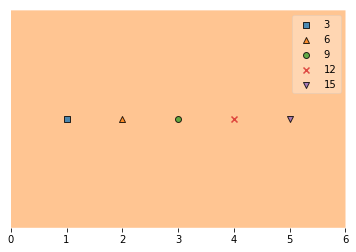

In [15]:
plot_decision_regions(X,Y,a)

In [17]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [18]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
